In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
%aimport src

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits

In [4]:
from src.operators import MeasurementOperator, RadialSampling, SpiderSampling, solver

Failed to import NUDFT_cupy (experimental). Use NUDFT() instead. 


## Loading Data

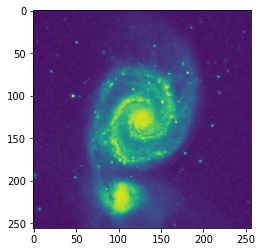

In [5]:
x_true = fits.getdata("../data/M51.fits")
plt.imshow(x_true)

## Measurement Operator

In [6]:
# u,v coordinates

#comparable to spider, 37 radia spokes with 24*10/2 baselines per spoke, uniformly distributed along the spokes
vis_radial = RadialSampling(n_spokes=37, n_bins=10*24//2, variance =0) 

# spider design, 37 radial spokes, 24 lenslets each, 10 spectral bins
vis_spider = SpiderSampling(n_spokes=37, n_lenslets=24, spectral_bins=10)

Text(0.5, 1.0, 'u,v plane SPIDER sampling N=4440')

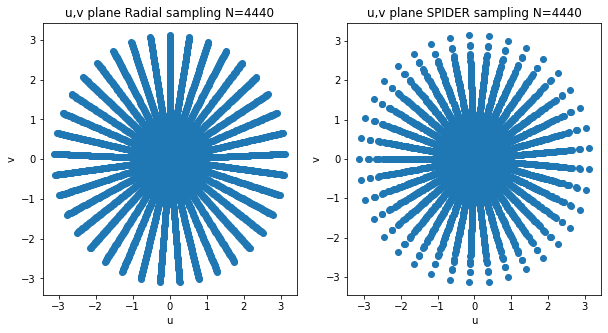

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].scatter(vis_radial[:,0], vis_radial[:,1])
ax[0].set_xlabel("u")
ax[0].set_ylabel("v")
ax[0].set_title(f"u,v plane Radial sampling N={len(vis_radial)}")

ax[1].scatter(vis_spider[:,0], vis_spider[:,1])
ax[1].set_xlabel("u")
ax[1].set_ylabel("v")
ax[1].set_title(f"u,v plane SPIDER sampling N={len(vis_spider)}")

In [8]:
# setting up measurement operator based on u,v sampling

Nd=(256,256) # input image size 
Kd=(512,512) # oversampled k-space size
Jd=(6,6) # interpolation kernel size

op_radial = MeasurementOperator(vis_radial, Nd=(256,256), Kd=(512,512), Jd=(6,6))
op_spider = MeasurementOperator(vis_spider, Nd=(256,256), Kd=(512,512), Jd=(6,6))

Text(0.5, 1.0, 'self adjoint (SPIDER)')

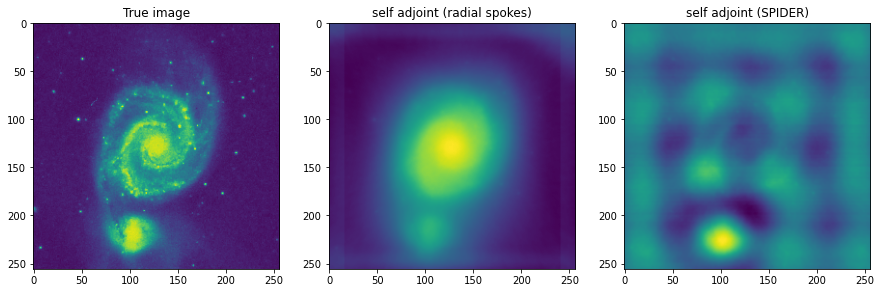

In [9]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
ax[0].imshow(x_true)
ax[0].set_title("True image")

ax[1].imshow(op_radial.self_adj(x_true).real)
ax[1].set_title("self adjoint (radial spokes)")

ax[2].imshow(op_spider.self_adj(x_true).real)
ax[2].set_title("self adjoint (SPIDER)")

## Solving using Optimus Primal

### Radial spokes design

In [11]:
# solving the radial u,v sampling
y = op_radial.dir_op(x_true) # measurements
result = solver(y, op_radial) # solver is hardcoded for now

2020-10-27 16:35:15,674 - Optimus Primal - INFO - Starting Power method
2020-10-27 16:35:15,745 - Optimus Primal - INFO - [Power Method] iter = 1, tol = 0.0
2020-10-27 16:35:15,784 - Optimus Primal - INFO - [Power Method] Converged with iter = 2, tol = 8.197506e-07
2020-10-27 16:35:15,925 - Optimus Primal - INFO - Running Forward Backward Primal Dual
2020-10-27 16:35:16,108 - Optimus Primal - INFO - [Primal Dual] 0 out of 5000 iterations, tol = 0.000000
2020-10-27 16:35:25,414 - Optimus Primal - INFO - [Primal Dual] 50 out of 5000 iterations, tol = 0.032507
2020-10-27 16:35:35,227 - Optimus Primal - INFO - [Primal Dual] 100 out of 5000 iterations, tol = 0.008981
2020-10-27 16:35:44,954 - Optimus Primal - INFO - [Primal Dual] 150 out of 5000 iterations, tol = 0.003784
2020-10-27 16:35:54,144 - Optimus Primal - INFO - [Primal Dual] 200 out of 5000 iterations, tol = 0.002743
2020-10-27 16:36:03,408 - Optimus Primal - INFO - [Primal Dual] 250 out of 5000 iterations, tol = 0.002226
2020-10-

Text(0.5, 1.0, 'Solution from Optimus Primal')

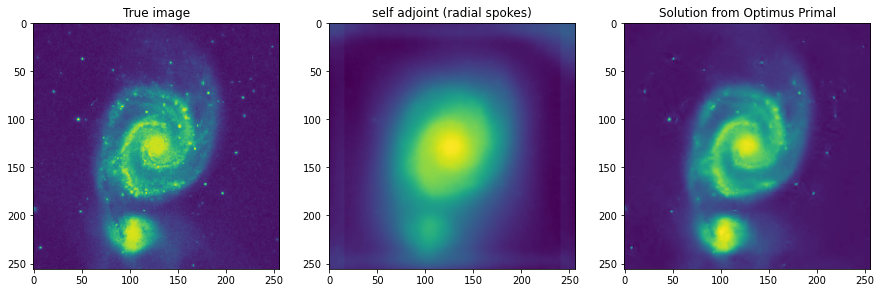

In [12]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
ax[0].imshow(x_true)
ax[0].set_title("True image")

ax[1].imshow(op_radial.self_adj(x_true).real)
ax[1].set_title("self adjoint (radial spokes)")

ax[2].imshow(result.real)
ax[2].set_title("Solution from Optimus Primal")

### SPIDER design

In [16]:
# solving the radial u,v sampling
y = op_spider.dir_op(x_true) # measurements
result = solver(y, op_spider) # solver is hardcoded for now

2020-10-27 16:39:31,756 - Optimus Primal - INFO - Starting Power method
2020-10-27 16:39:31,829 - Optimus Primal - INFO - [Power Method] iter = 1, tol = 0.0
2020-10-27 16:39:32,176 - Optimus Primal - INFO - [Power Method] iter = 11, tol = 0.0
2020-10-27 16:39:32,559 - Optimus Primal - INFO - [Power Method] iter = 21, tol = 0.0
2020-10-27 16:39:32,933 - Optimus Primal - INFO - [Power Method] iter = 31, tol = 0.0
2020-10-27 16:39:33,289 - Optimus Primal - INFO - [Power Method] iter = 41, tol = 0.0
2020-10-27 16:39:33,326 - Optimus Primal - INFO - [Power Method] Converged with iter = 42, tol = 0.00095780636
2020-10-27 16:39:33,475 - Optimus Primal - INFO - Running Forward Backward Primal Dual
2020-10-27 16:39:33,672 - Optimus Primal - INFO - [Primal Dual] 0 out of 5000 iterations, tol = 0.000000
2020-10-27 16:39:43,254 - Optimus Primal - INFO - [Primal Dual] 50 out of 5000 iterations, tol = 0.025664
2020-10-27 16:39:52,640 - Optimus Primal - INFO - [Primal Dual] 100 out of 5000 iterations

Text(0.5, 1.0, 'Solution from Optimus Primal')

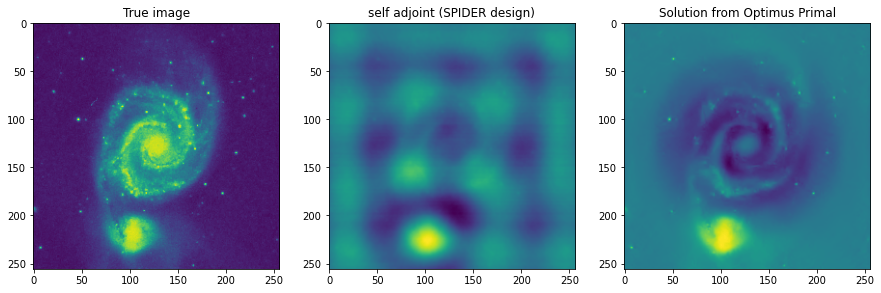

In [18]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
ax[0].imshow(x_true)
ax[0].set_title("True image")

ax[1].imshow(op_spider.self_adj(x_true).real)
ax[1].set_title("self adjoint (SPIDER design)")

ax[2].imshow(result.real)
ax[2].set_title("Solution from Optimus Primal")